Lichess.org website scraping for lichess titled arena winners, runner ups, 3th places, 4th places and 5th places.

Lichess.org is a very popular online free chess server, it offers players from different part of the world opportunity to play online chess with each other for free with no charges. It also host a tournament every month called Titled Arena, which played by only Titled players such as Grandmasters, Fide masters, National masters etc.

This project uses python libraries to scrape lichess.org website for the winners of Titled Arena tournament between December 2017 and March 2020 and Analysis.

## Web scraping libraries

In [1]:
import requests #request library is used for making HTTP request 

In [2]:
from bs4 import BeautifulSoup #beautiful soup is used to pull data from the web

In [3]:
import lxml #lxml library is used for parsing HTML

## Data analysis libraries

In [4]:
import pandas as pd #pandas is a data analysis tool
import matplotlib.pyplot as plt #matplotlib is a Data Viz tool

## Making requests to lichess website

In [5]:
url = 'https://lichess.fandom.com/wiki/List_of_winners_of_Titled_Arenas'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'lxml')
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of winners of Titled Arenas | Lichess Wiki | Fandom</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_winners_of_Titled_Arenas","wgTitle":"List of winners of Titled Arenas","wgCurRevisionId":886,"wgRevisionId":886,"wgArticleId":430,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Lists"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","S

## Scraping lichess wiki for Lichess titled arena winners table

In [6]:
table = soup.find('table', {'class':'wikitable'})
headers = []
for i in table.find_all('th'):
    title = i.text.strip()
    headers.append(title)

## Creating a DataFrame for the table so that table data can be appended to table headers  above

In [7]:
df = pd.DataFrame(columns=headers)

In [8]:
for row in table.find_all('tr')[1:]:
    data = row.find_all('td')
    row_data = [td.text.strip() for td in data]
    lenght = len(df)
    df.loc[lenght] = row_data

In [9]:
df

,Name,Date,Number of participants,Prize fund,1st place,2nd place,3rd place,4th place,5th place,Notes,Links
0,First Lichess Titled Arena[1],14 December 2017,118,$1000,Magnus Carlsen,Fabiano Caruana,Andrew Tang,Georg Meier,TheWarning (Anonymous),Carlsen gave his prize back to Lichess,[1]
1,Lichess Titled Arena 2[2],18 January 2018,145,$1500,Magnus Carlsen,Andrew Tang,Vincent Rothuis,Arka50 (Anonymous),Tuan Minh Le,Carlsen gave his prize back to Lichess,[2]
2,Lichess Titled Arena 3[3],1 March 2018,188,$2200,Magnus Carlsen,Daniel Naroditsky,Template:Ill,Andrew Tang,Jules Moussard,Carlsen gave his prize back to Lichess,[3]
3,Lichess Titled Arena 4[4],12 April 2018,218,$3200,Magnus Carlsen,Andrew Tang,Olexandr Bortnyk,Template:Ill,Jahongir Vakhidov,Carlsen gave his prize back to Lichess,[4]
4,Lichess Titled Arena 5[5],4 May 2018,237,$3600,Andrew Tang,Alireza Firouzja,Arka50 (Anonymous),Diptayan Ghosh,Jules Moussard,First time Carlsen does not win the Titled Arena,[5]
5,Lichess Titled Arena 6[6],4 August 2018,208,$1000,Magnus Carlsen,Daniel Naroditsky,Olexandr Bortnyk,Template:Ill,Akshat Chandra,Carlsen gave his prize back to Lichess[7],[6]
6,Lichess Titled Arena 7[8],7 September 2018,226,$1500,Tuan Minh Le,Zaven Andriasian,Magnus Carlsen,Daniel Naroditsky,Georg Meier,Carlsen played the tournament from his phone[9],[7]
7,Lichess Titled Arena 8[10],26 October 2018,227,$1125,Magnus Carlsen,Andrew Tang,Template:Ill,Alireza Firouzja,Sergei Zhigalko,,[8]
8,Lichess Titled Arena 9[11],12 December 2018,200,$1000,Magnus Carlsen,Andrew Tang,Template:Ill,Daniel Naroditsky,Sergei Zhigalko,,[9]
9,Lichess Titled Arena Jan '19[12],5 January 2019,347,$1000,Magnus Carlsen,Olexandr Bortnyk,Template:Ill,Alireza Firouzja,Sergei Zhigalko,,[10]


## Saving the Dataframe as a CSV file

In [10]:
df.to_csv("lichess titled arena winners.csv", encoding='utf-8')

## Using pandas to read the csv file for analysis

In [11]:
lichess_data = pd.read_csv("lichess titled arena winners.csv")



In [12]:
lichess_data.sample(10) # 10 samples from the Dataframe

,Unnamed: 0,Name,Date,Number of participants,Prize fund,1st place,2nd place,3rd place,4th place,5th place,Notes,Links
19,19,Lichess Titled Arena Nov '19,23 November 2019,356,$1000,Alireza Firouzja,Andrew Tang,Renato Terry,Olexandr Bortnyk,Zaven Andriasian,NaN,[20]
15,15,Lichess Titled Arena Jul '19[19],13 July 2019,332,$1000,Alireza Firouzja,Magnus Carlsen,Template:Ill,Saveliy Golubov,Daniel Naroditsky,NaN,[16]
7,7,Lichess Titled Arena 8[10],26 October 2018,227,$1125,Magnus Carlsen,Andrew Tang,Template:Ill,Alireza Firouzja,Sergei Zhigalko,NaN,[8]
24,24,Lichess Titled Arena Mar '20,21 March 2020,942,$1000,Alireza Firouzja,Magnus Carlsen,Dmitry Andreikin,[Esssquire],[Golubov_Saveliy],NaN,[25]
8,8,Lichess Titled Arena 9[11],12 December 2018,200,$1000,Magnus Carlsen,Andrew Tang,Template:Ill,Daniel Naroditsky,Sergei Zhigalko,NaN,[9]
23,23,Lichess Titled Arena Mar '20,7 March 2020,415,$1000,Alireza Firouzja,Magnus Carlsen,Andrew Tang,FeegLood (Anonymous),Federico Perez Ponsa,NaN,[24]
1,1,Lichess Titled Arena 2[2],18 January 2018,145,$1500,Magnus Carlsen,Andrew Tang,Vincent Rothuis,Arka50 (Anonymous),Tuan Minh Le,Carlsen gave his prize back to Lichess,[2]
10,10,Lichess Titled Arena Feb '19[13],9 February 2019,349,$1000,Magnus Carlsen,Andrew Tang,Daniel Naroditsky,Tuan Minh Le,Template:Ill,NaN,[11]
5,5,Lichess Titled Arena 6[6],4 August 2018,208,$1000,Magnus Carlsen,Daniel Naroditsky,Olexandr Bortnyk,Template:Ill,Akshat Chandra,Carlsen gave his prize back to Lichess[7],[6]
17,17,Lichess Titled Arena Oct '19,16 October 2019,395,$1000,Alireza Firouzja,Dmitry Andreikin,Daniel Naroditsky,Federico Perez Ponsa,Andrew Tang,NaN,[18]


## Columns in the DataFrame

In [13]:
lichess_data.columns = ['game_id', 'Name', 'Date', 'Number of participants', 'Prize fund',
       '1st place', '2nd place', '3rd place', '4th place', '5th place',
       'Notes', 'Links']


## Removing unwanted columns from the dataframe(Dimensionality Reduction)

In [14]:
lichess_df = lichess_data.drop(columns=['Name', 'Notes', 'Links'])

In [15]:
lichess_df.head(5)

,game_id,Date,Number of participants,Prize fund,1st place,2nd place,3rd place,4th place,5th place
0,0,14 December 2017,118,$1000,Magnus Carlsen,Fabiano Caruana,Andrew Tang,Georg Meier,TheWarning (Anonymous)
1,1,18 January 2018,145,$1500,Magnus Carlsen,Andrew Tang,Vincent Rothuis,Arka50 (Anonymous),Tuan Minh Le
2,2,1 March 2018,188,$2200,Magnus Carlsen,Daniel Naroditsky,Template:Ill,Andrew Tang,Jules Moussard
3,3,12 April 2018,218,$3200,Magnus Carlsen,Andrew Tang,Olexandr Bortnyk,Template:Ill,Jahongir Vakhidov
4,4,4 May 2018,237,$3600,Andrew Tang,Alireza Firouzja,Arka50 (Anonymous),Diptayan Ghosh,Jules Moussard


In [16]:
lichess_df['Number of participants'].mean() #getting the mean of the participants

320.08

In [17]:
lichess_df.isna().sum() #checking if there is any NaN values in the table 


game_id                   0
Date                      0
Number of participants    0
Prize fund                0
1st place                 0
2nd place                 0
3rd place                 0
4th place                 0
5th place                 0
dtype: int64

In [18]:
lichess_df.duplicated() #checking for Duplicated values in the table

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

In [19]:
lichess_df.columns.value_counts().sum() #total number of columns in the table

9

In [20]:
lichess_df.describe() #statistical discription of the table

,game_id,Number of participants
count,25.000000,25.000000
mean,12.000000,320.080000
std,7.359801,156.184965
min,0.000000,118.000000
25%,6.000000,226.000000
50%,12.000000,325.000000
75%,18.000000,355.000000
max,24.000000,942.000000


In [21]:
lichess_df.shape #number of rows and columns in the table

(25, 9)

In [22]:
lichess_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
game_id                   25 non-null int64
Date                      25 non-null object
Number of participants    25 non-null int64
Prize fund                25 non-null object
1st place                 25 non-null object
2nd place                 25 non-null object
3rd place                 25 non-null object
4th place                 25 non-null object
5th place                 25 non-null object
dtypes: int64(2), object(7)
memory usage: 1.9+ KB


In [23]:
lichess_df.head(5) #getting the first 5 rows in the dataset

,game_id,Date,Number of participants,Prize fund,1st place,2nd place,3rd place,4th place,5th place
0,0,14 December 2017,118,$1000,Magnus Carlsen,Fabiano Caruana,Andrew Tang,Georg Meier,TheWarning (Anonymous)
1,1,18 January 2018,145,$1500,Magnus Carlsen,Andrew Tang,Vincent Rothuis,Arka50 (Anonymous),Tuan Minh Le
2,2,1 March 2018,188,$2200,Magnus Carlsen,Daniel Naroditsky,Template:Ill,Andrew Tang,Jules Moussard
3,3,12 April 2018,218,$3200,Magnus Carlsen,Andrew Tang,Olexandr Bortnyk,Template:Ill,Jahongir Vakhidov
4,4,4 May 2018,237,$3600,Andrew Tang,Alireza Firouzja,Arka50 (Anonymous),Diptayan Ghosh,Jules Moussard


In [24]:
print('unique values:\n', lichess_df['Prize fund'].unique(), '\n')
print('count of each values:\n', lichess_df['Prize fund'].value_counts(), '\n')
print('list of the values:\n', lichess_df['Prize fund'].values)

unique values:
 ['$1000' '$1500' '$2200' '$3200' '$3600' '$1125'] 

count of each values:
 $1000    18
$1500     3
$3600     1
$3200     1
$1125     1
$2200     1
Name: Prize fund, dtype: int64 

list of the values:
 ['$1000' '$1500' '$2200' '$3200' '$3600' '$1000' '$1500' '$1125' '$1000'
 '$1000' '$1000' '$1000' '$1500' '$1000' '$1000' '$1000' '$1000' '$1000'
 '$1000' '$1000' '$1000' '$1000' '$1000' '$1000' '$1000']


## Getting the number of winners and how many times they won 

In [25]:
print('Winners:\n', lichess_df['1st place'].unique(), '\n')
print('How many times each winners won:\n', lichess_df['1st place'].value_counts(), '\n')
print('Order of their wins:\n', lichess_df['1st place'].values)

Winners:
 ['Magnus Carlsen' 'Andrew Tang' 'Tuan Minh Le' 'Alireza Firouzja'
 'Saveliy Golubov' 'Zaven Andriasian'] 

How many times each winners won:
 Magnus Carlsen      13
Alireza Firouzja     7
Andrew Tang          2
Zaven Andriasian     1
Saveliy Golubov      1
Tuan Minh Le         1
Name: 1st place, dtype: int64 

Order of their wins:
 ['Magnus Carlsen' 'Magnus Carlsen' 'Magnus Carlsen' 'Magnus Carlsen'
 'Andrew Tang' 'Magnus Carlsen' 'Tuan Minh Le' 'Magnus Carlsen'
 'Magnus Carlsen' 'Magnus Carlsen' 'Magnus Carlsen' 'Magnus Carlsen'
 'Magnus Carlsen' 'Magnus Carlsen' 'Magnus Carlsen' 'Alireza Firouzja'
 'Saveliy Golubov' 'Alireza Firouzja' 'Zaven Andriasian'
 'Alireza Firouzja' 'Alireza Firouzja' 'Andrew Tang' 'Alireza Firouzja'
 'Alireza Firouzja' 'Alireza Firouzja']


In [26]:
print('runners up:\n', lichess_df['2nd place'].unique(), '\n')
print('How many times each ran up:\n', lichess_df['2nd place'].value_counts(), '\n')
print('Order of the times they ran up:\n', lichess_df['2nd place'].values)

runners up:
 ['Fabiano Caruana' 'Andrew Tang' 'Daniel Naroditsky' 'Alireza Firouzja'
 'Zaven Andriasian' 'Olexandr Bortnyk' 'Watneg (Anonymous)'
 'Janak Awatramani' 'Illya Nyzhnyk' 'Magnus Carlsen' 'Dmitry Andreikin'
 'Sergei Zhigalko' 'Tuan Minh Le'] 

How many times each ran up:
 Andrew Tang           7
Magnus Carlsen        4
Daniel Naroditsky     3
Watneg (Anonymous)    2
Illya Nyzhnyk         1
Sergei Zhigalko       1
Dmitry Andreikin      1
Tuan Minh Le          1
Alireza Firouzja      1
Janak Awatramani      1
Fabiano Caruana       1
Olexandr Bortnyk      1
Zaven Andriasian      1
Name: 2nd place, dtype: int64 

Order of the times they ran up:
 ['Fabiano Caruana' 'Andrew Tang' 'Daniel Naroditsky' 'Andrew Tang'
 'Alireza Firouzja' 'Daniel Naroditsky' 'Zaven Andriasian' 'Andrew Tang'
 'Andrew Tang' 'Olexandr Bortnyk' 'Andrew Tang' 'Watneg (Anonymous)'
 'Janak Awatramani' 'Illya Nyzhnyk' 'Andrew Tang' 'Magnus Carlsen'
 'Magnus Carlsen' 'Dmitry Andreikin' 'Daniel Naroditsky' 'Andrew

In [27]:
print('Third place:\n', lichess_df['3rd place'].unique(), '\n')
print('How many times they finished third:\n', lichess_df['3rd place'].value_counts(), '\n')
print('Order of the times they finished third:\n', lichess_df['3rd place'].values)

Third place:
 ['Andrew Tang' 'Vincent Rothuis' 'Template:Ill' 'Olexandr Bortnyk'
 'Arka50 (Anonymous)' 'Magnus Carlsen' 'Daniel Naroditsky'
 'Dr-BassemAmin (Anonymous)' 'Akshat Chandra' 'caching (Anonymous)'
 'Watneg (Anonymous)' 'Former_Player (Anonymous)' 'Renato Terry'
 'Minhe Le' 'Nihal Sarin' 'Dmitry Andreikin'] 

How many times they finished third:
 Template:Ill                 5
Andrew Tang                  3
Daniel Naroditsky            2
Dmitry Andreikin             2
Olexandr Bortnyk             2
Vincent Rothuis              1
Watneg (Anonymous)           1
Minhe Le                     1
Akshat Chandra               1
Arka50 (Anonymous)           1
Former_Player (Anonymous)    1
Magnus Carlsen               1
caching (Anonymous)          1
Renato Terry                 1
Dr-BassemAmin (Anonymous)    1
Nihal Sarin                  1
Name: 3rd place, dtype: int64 

Order of the times they finished third:
 ['Andrew Tang' 'Vincent Rothuis' 'Template:Ill' 'Olexandr Bortnyk'
 'Arka

In [28]:
print('Fourth place:\n', lichess_df['4th place'].unique(), '\n')
print('How many times they finished fourth:\n', lichess_df['4th place'].value_counts(), '\n')
print('Order of the times they finished fourth:\n', lichess_df['4th place'].values)

Fourth place:
 ['Georg Meier' 'Arka50 (Anonymous)' 'Andrew Tang' 'Template:Ill'
 'Diptayan Ghosh' 'Daniel Naroditsky' 'Alireza Firouzja' 'Tuan Minh Le'
 'Olexandr Bortnyk' 'Watneg (Anonymous)' 'LyinTed (Anonymous)'
 'Saveliy Golubov' 'Federico Perez Ponsa' 'Maxim Lavrov'
 'Oleksandr Bortnyk' 'Arjun Erigaisi' 'FeegLood (Anonymous)' '[Esssquire]'] 

How many times they finished fourth:
 Daniel Naroditsky       3
Alireza Firouzja        3
Template:Ill            2
Andrew Tang             2
Olexandr Bortnyk        2
Diptayan Ghosh          1
Federico Perez Ponsa    1
LyinTed (Anonymous)     1
Maxim Lavrov            1
Saveliy Golubov         1
Georg Meier             1
Arka50 (Anonymous)      1
Watneg (Anonymous)      1
FeegLood (Anonymous)    1
Arjun Erigaisi          1
[Esssquire]             1
Oleksandr Bortnyk       1
Tuan Minh Le            1
Name: 4th place, dtype: int64 

Order of the times they finished fourth:
 ['Georg Meier' 'Arka50 (Anonymous)' 'Andrew Tang' 'Template:Ill'
 'Dip

In [29]:
print('Winners:\n', lichess_df['5th place'].unique(), '\n')
print('How many times they finished fifth:\n', lichess_df['5th place'].value_counts(), '\n')
print('Order of the times they finished fifth:\n', lichess_df['5th place'].values)

Winners:
 ['TheWarning (Anonymous)' 'Tuan Minh Le' 'Jules Moussard'
 'Jahongir Vakhidov' 'Akshat Chandra' 'Georg Meier' 'Sergei Zhigalko'
 'Template:Ill' 'Saveliy Golubov' 'Diptayan Ghosh' 'Daniel Naroditsky'
 'Olexandr Bortnyk' 'Andrew Tang' 'Zaven Andriasian' 'Eric Hansen'
 'Watneg (Anonymous)' 'Federico Perez Ponsa' '[Golubov_Saveliy]'] 

How many times they finished fifth:
 Sergei Zhigalko           4
Template:Ill              3
Diptayan Ghosh            2
Jules Moussard            2
TheWarning (Anonymous)    1
Eric Hansen               1
[Golubov_Saveliy]         1
Jahongir Vakhidov         1
Daniel Naroditsky         1
Andrew Tang               1
Akshat Chandra            1
Tuan Minh Le              1
Saveliy Golubov           1
Zaven Andriasian          1
Federico Perez Ponsa      1
Georg Meier               1
Watneg (Anonymous)        1
Olexandr Bortnyk          1
Name: 5th place, dtype: int64 

Order of the times they finished fifth:
 ['TheWarning (Anonymous)' 'Tuan Minh Le' '

## Plotting the number of the times each winners won against winners' name

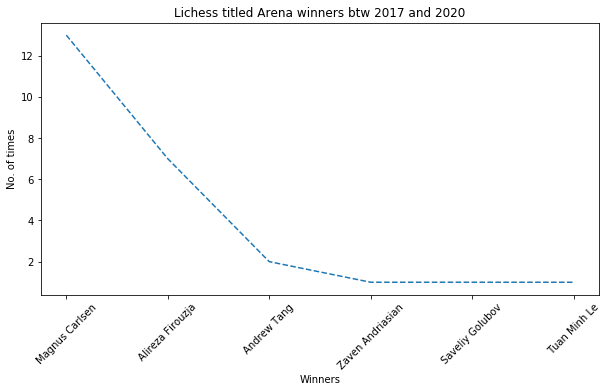

In [30]:
first = lichess_df['1st place'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(first, linestyle='--')
plt.xticks(rotation=45)
plt.title('Lichess titled Arena winners btw 2017 and 2020')
plt.xlabel('Winners')
plt.ylabel('No. of times')
plt.show()

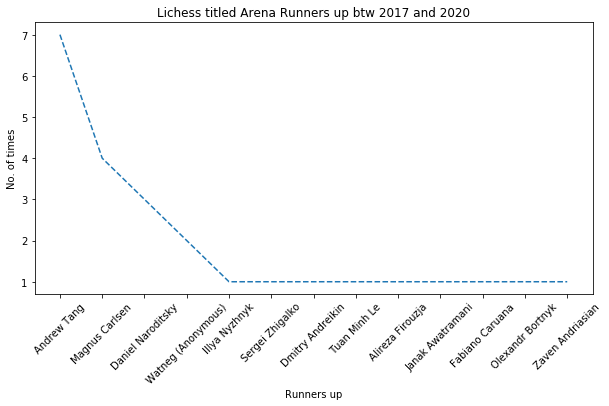

In [31]:
# lichess_dt['2nd place'].value_counts().plot()
runner_ups = lichess_df['2nd place'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(runner_ups, linestyle='--')
plt.xticks(rotation=45)
plt.title('Lichess titled Arena Runners up btw 2017 and 2020')
plt.xlabel('Runners up')
plt.ylabel('No. of times')
plt.show()

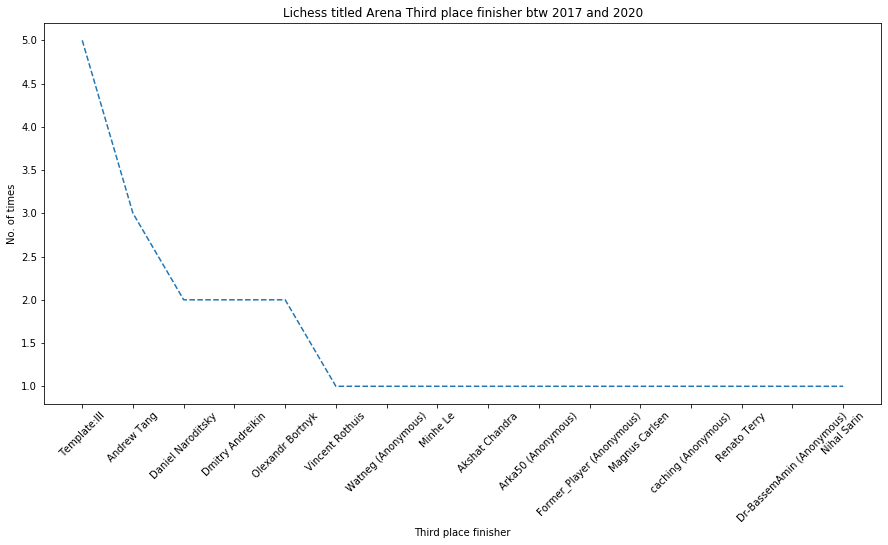

In [32]:
# lichess_dt['3rd place'].value_counts().plot()
third_place = lichess_df['3rd place'].value_counts()
plt.figure(figsize=(15,7))
plt.plot(third_place, linestyle='--')
plt.xticks(rotation=45)
plt.title('Lichess titled Arena Third place finisher btw 2017 and 2020')
plt.xlabel('Third place finisher')
plt.ylabel('No. of times')
plt.show()

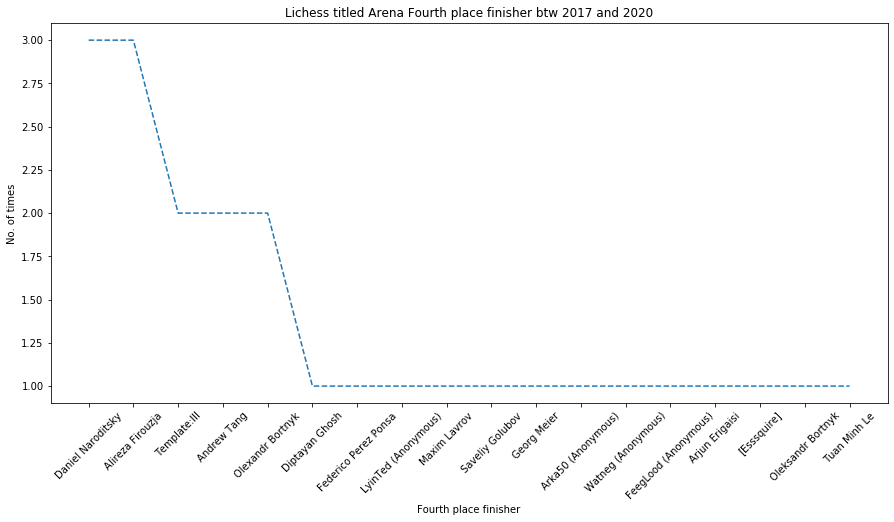

In [33]:
fourth_place = lichess_df['4th place'].value_counts()
plt.figure(figsize=(15,7))
plt.plot(fourth_place, linestyle='--')
plt.xticks(rotation=45)
plt.title('Lichess titled Arena Fourth place finisher btw 2017 and 2020')
plt.xlabel('Fourth place finisher')
plt.ylabel('No. of times')
plt.show()

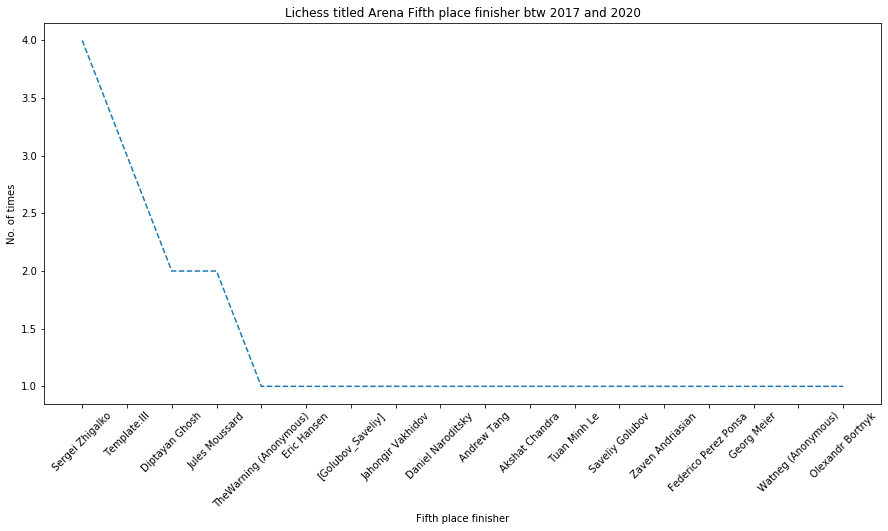

In [34]:
fifth_place = lichess_df['5th place'].value_counts()
plt.figure(figsize=(15,7))
plt.plot(fifth_place, linestyle='--')
plt.xticks(rotation=45)
plt.title('Lichess titled Arena Fifth place finisher btw 2017 and 2020')
plt.xlabel('Fifth place finisher')
plt.ylabel('No. of times')
plt.show()

# THE END, Thank you for following along.